In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import numpy as np

In [148]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('telcom_data.csv')


In [150]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/19 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [152]:
print("Dataset Overview:")
df.info()


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Av

In [158]:
print("Descriptive Statistics:")
num_summary=df.describe().T
num_summary['IQR'] = num_summary['75%'] - num_summary['25%']
num_summary

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max,IQR
Bearer Id,149010.0,1.013887e+19,2.893170e+18,6.917540e+18,7.349880e+18,7.349880e+18,1.304240e+19,1.318650e+19,5.692520e+18
Start ms,150000.0,4.991882e+02,2.886118e+02,0.000000e+00,2.500000e+02,4.990000e+02,7.490000e+02,9.990000e+02,4.990000e+02
End ms,150000.0,4.988009e+02,2.880977e+02,0.000000e+00,2.510000e+02,5.000000e+02,7.500000e+02,9.990000e+02,4.990000e+02
Dur. (ms),150000.0,1.046086e+05,8.103762e+04,7.142000e+03,5.744050e+04,8.639900e+04,1.324302e+05,1.859336e+06,7.498975e+04
IMSI,149431.0,2.082016e+14,2.148809e+10,2.040471e+14,2.082014e+14,2.082015e+14,2.082018e+14,2.140743e+14,3.703559e+08
MSISDN/Number,148935.0,4.188282e+10,2.447443e+12,3.360100e+10,3.365130e+10,3.366371e+10,3.368349e+10,8.823971e+14,3.219519e+07
IMEI,149429.0,4.847455e+13,2.241637e+13,4.400152e+11,3.546071e+13,3.572201e+13,8.611970e+13,9.900120e+13,5.065900e+13
Avg RTT DL (ms),122172.0,1.097957e+02,6.197827e+02,0.000000e+00,3.200000e+01,4.500000e+01,7.000000e+01,9.692300e+04,3.800000e+01
Avg RTT UL (ms),122189.0,1.766288e+01,8.479352e+01,0.000000e+00,2.000000e+00,5.000000e+00,1.500000e+01,7.120000e+03,1.300000e+01
Avg Bearer TP DL (kbps),150000.0,1.330005e+04,2.397188e+04,0.000000e+00,4.300000e+01,6.300000e+01,1.971075e+04,3.781600e+05,1.966775e+04


In [160]:
# column names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [162]:

print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


In [164]:
# Missing values count
missing_values = df.isnull().sum()
# Filter columns with missing data
missing_data = missing_values[missing_values > 0].sort_values(ascending=False)

print("Columns with Missing Values:")
print(missing_data)

Columns with Missing Values:
Nb of sec with 37500B < Vol UL              130254
Nb of sec with 6250B < Vol UL < 37500B      111843
Nb of sec with 125000B < Vol DL              97538
TCP UL Retrans. Vol (Bytes)                  96649
Nb of sec with 31250B < Vol DL < 125000B     93586
Nb of sec with 1250B < Vol UL < 6250B        92894
Nb of sec with 6250B < Vol DL < 31250B       88317
TCP DL Retrans. Vol (Bytes)                  88146
HTTP UL (Bytes)                              81810
HTTP DL (Bytes)                              81474
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Last Location Name                            1153
MSISDN/Number                                 1066
Bearer Id                                      991
Nb of sec with Vol UL < 1250B                  793
10 Kbps < UL TP < 50 Kbps (%)                  792
UL TP > 300 Kbps (%)                           792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL

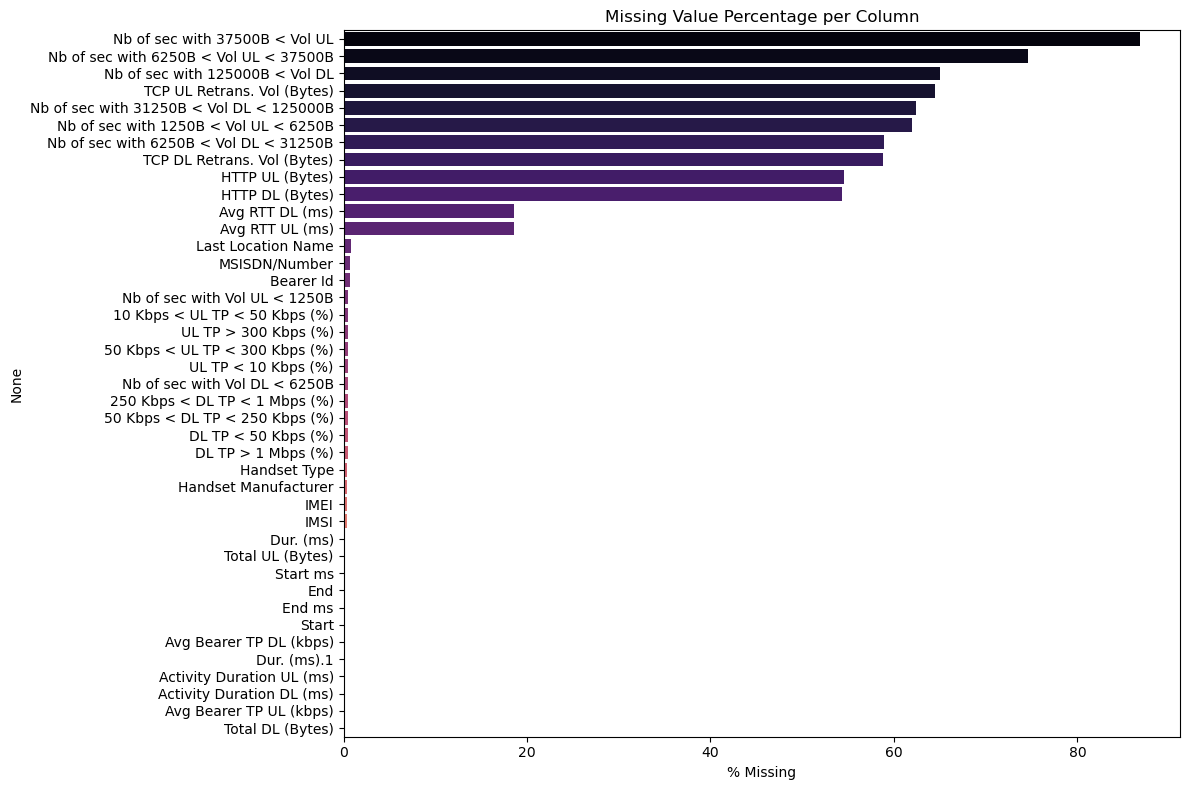

In [166]:
# Percentage of missing values
missing = df.isnull().mean() * 100
missing = missing[missing > 0].sort_values(ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x=missing.values, y=missing.index, palette="magma")
plt.title("Missing Value Percentage per Column")
plt.xlabel("% Missing")
plt.tight_layout()
plt.show()

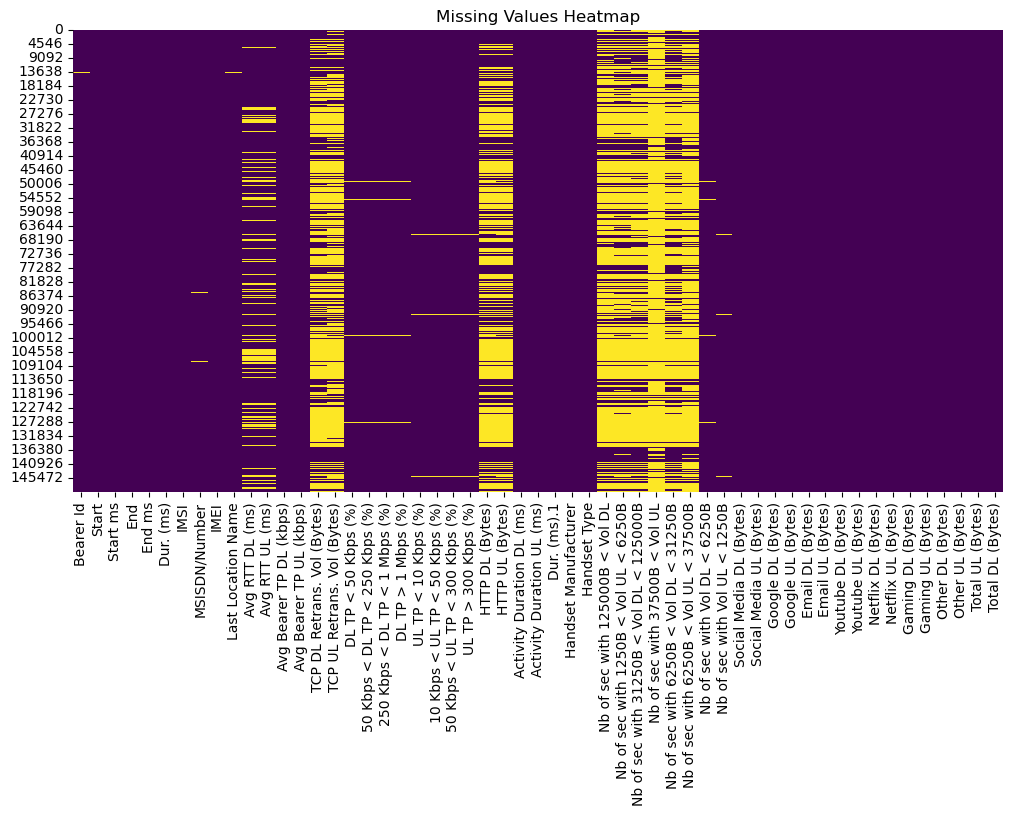

In [168]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Finding Duplicates

In [169]:
# Count duplicated rows
duplicates = df.duplicated().sum()
print(f" Number of duplicate rows: {duplicates}")

 Number of duplicate rows: 0


# Handling Missing Values

In [172]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [174]:
# Skewness in Numerical Columns
df[numerical_cols].skew()

Bearer Id                                     0.026667
Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952609
IMSI                                         41.045956
MSISDN/Number                               332.155856
IMEI                                          1.071470
Avg RTT DL (ms)                              62.907828
Avg RTT UL (ms)                              28.457415
Avg Bearer TP DL (kbps)                       2.589437
Avg Bearer TP UL (kbps)                       4.503413
TCP DL Retrans. Vol (Bytes)                  15.951809
TCP UL Retrans. Vol (Bytes)                  84.113393
DL TP < 50 Kbps (%)                          -2.297803
50 Kbps < DL TP < 250 Kbps (%)                3.271453
250 Kbps < DL TP < 1 Mbps (%)                 4.566158
DL TP > 1 Mbps (%)                            5.370351
UL TP < 10 Kbps (%)                          -8.985016
10 Kbps < 

In [176]:
# Fill Missing Values in Numerical Columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        # If the column is skewed (abs(skew) > 1), use median; else mean
        if abs(df[col].skew()) > 1:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)

In [178]:
# Fill Missing Values in Categorical Columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [180]:
df.isnull().sum().sum()

0

In [182]:
df.isnull().sum().iloc[0:55]
     

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [184]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

# Data Types and Unique Counts for Categorical Columns

In [186]:
cat_columns = df.select_dtypes(include='object').columns

for col in cat_columns:
    print(f" {col}: {df[col].nunique()} unique values")

 Start: 9997 unique values
 End: 6403 unique values
 Last Location Name: 45036 unique values
 Handset Manufacturer: 170 unique values
 Handset Type: 1396 unique values


# Outlier Detection

In [190]:

import numpy as np

# Z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(include='number')))
outliers_z = (z_scores > 3).sum(axis=0)

# IQR method
def detect_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum()

outliers_iqr = df.select_dtypes(include='number').apply(detect_outliers_iqr)

# Combine
outliers_df = pd.DataFrame({
    'Outliers_Z': outliers_z,
    'Outliers_IQR': outliers_iqr
}).sort_values('Outliers_IQR', ascending=False)

outliers_df.head()


,Outliers_Z,Outliers_IQR
HTTP DL (Bytes),552,68526
HTTP UL (Bytes),691,68190
TCP DL Retrans. Vol (Bytes),550,61854
Nb of sec with 6250B < Vol DL < 31250B,2582,61654
Nb of sec with 1250B < Vol UL < 6250B,1211,56909


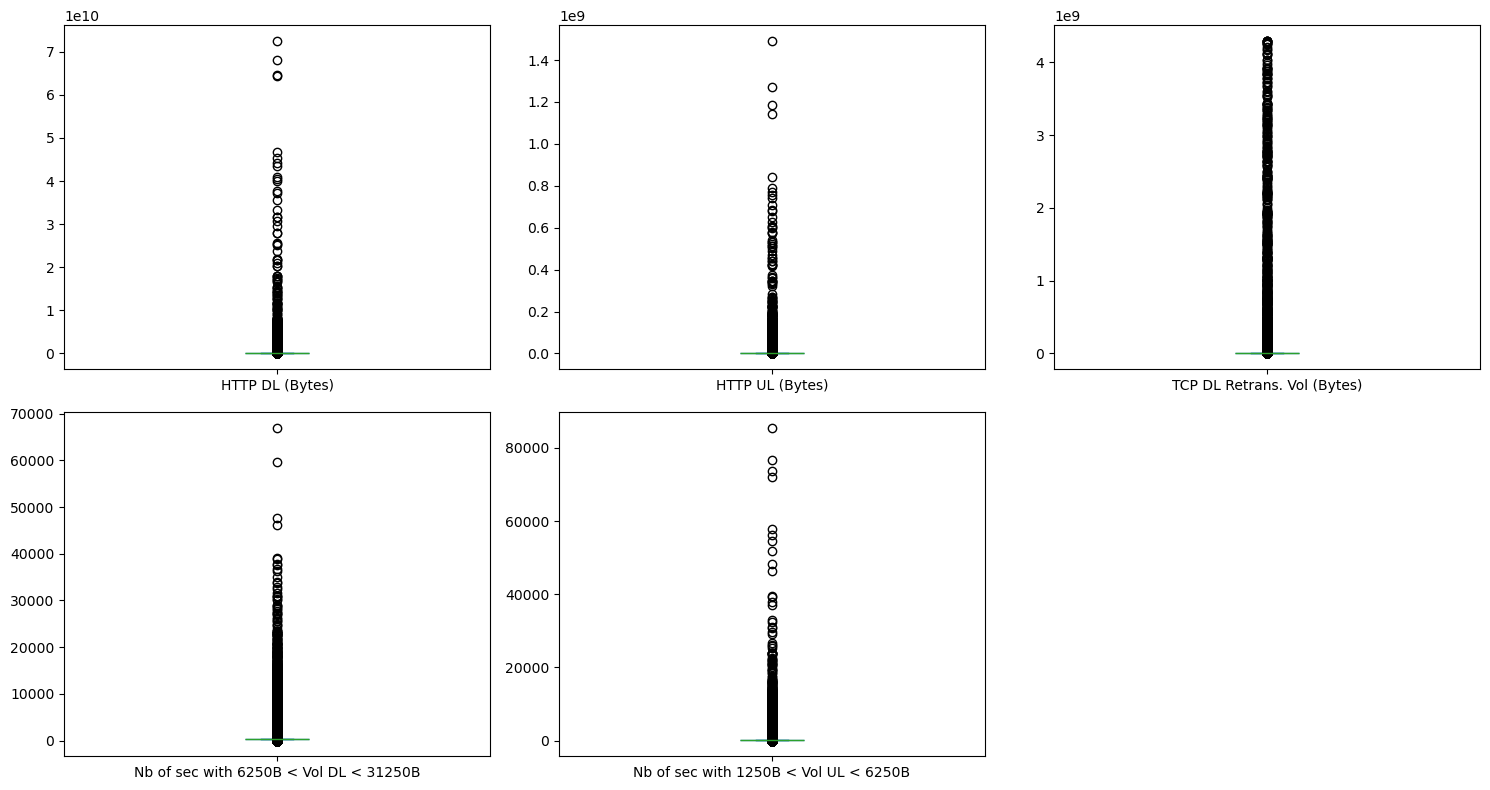

In [192]:
top_outliers = outliers_df.head(5).index.tolist()
df[top_outliers].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 8), patch_artist=True)
plt.tight_layout()
plt.show()

In [194]:
# Function to cap outliers using IQR
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap the outliers
    data[column] = np.where(data[column] < lower, lower,
                    np.where(data[column] > upper, upper, data[column]))
    return data

#  function to each numeric column
for col in numeric_cols:
    df = cap_outliers_iqr(df, col)

print("Outliers handled successfully (capped to IQR bounds).")

Outliers handled successfully (capped to IQR bounds).


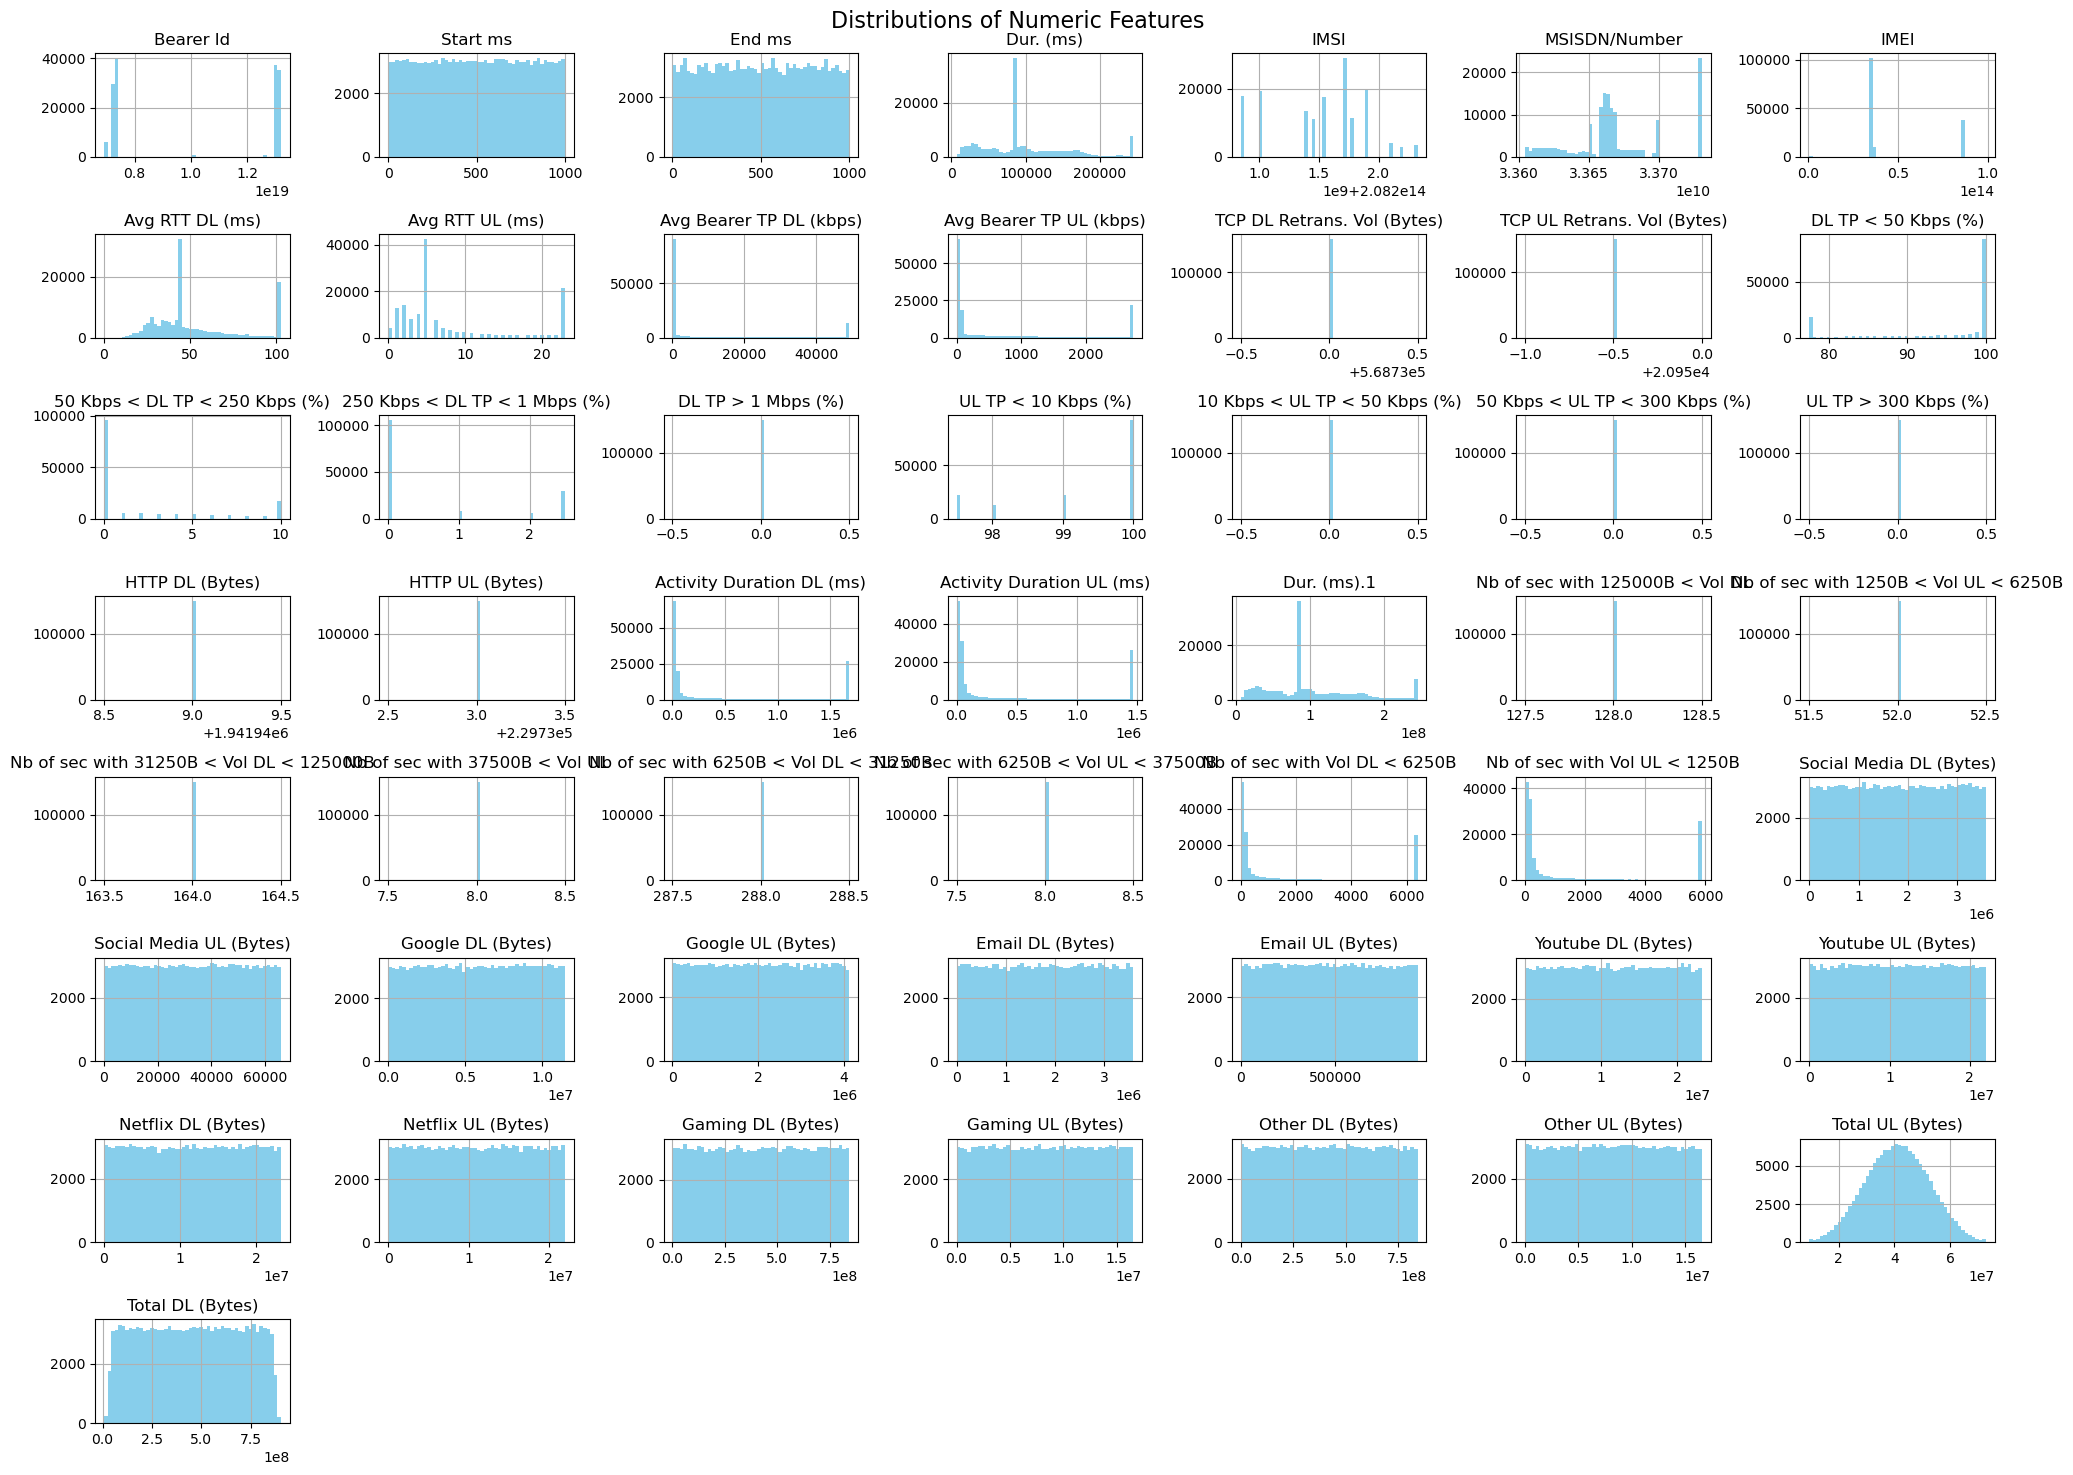

In [200]:
# Histograms for numeric data
df.select_dtypes(include='number').hist(bins=50, figsize=(20, 15), color='skyblue')
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()



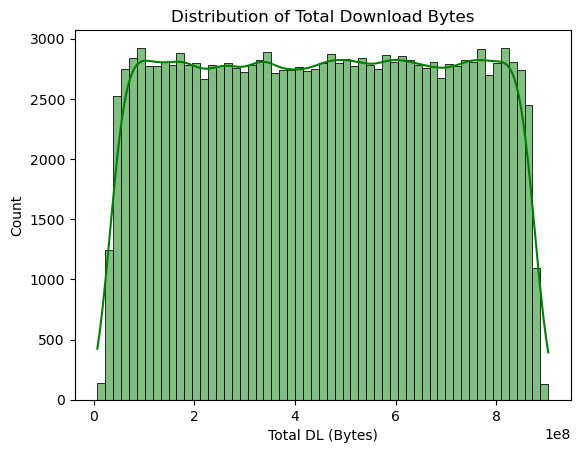

In [202]:
# KDE + Histogram 
sns.histplot(df['Total DL (Bytes)'], kde=True, color='green')
plt.title("Distribution of Total Download Bytes")
plt.show()

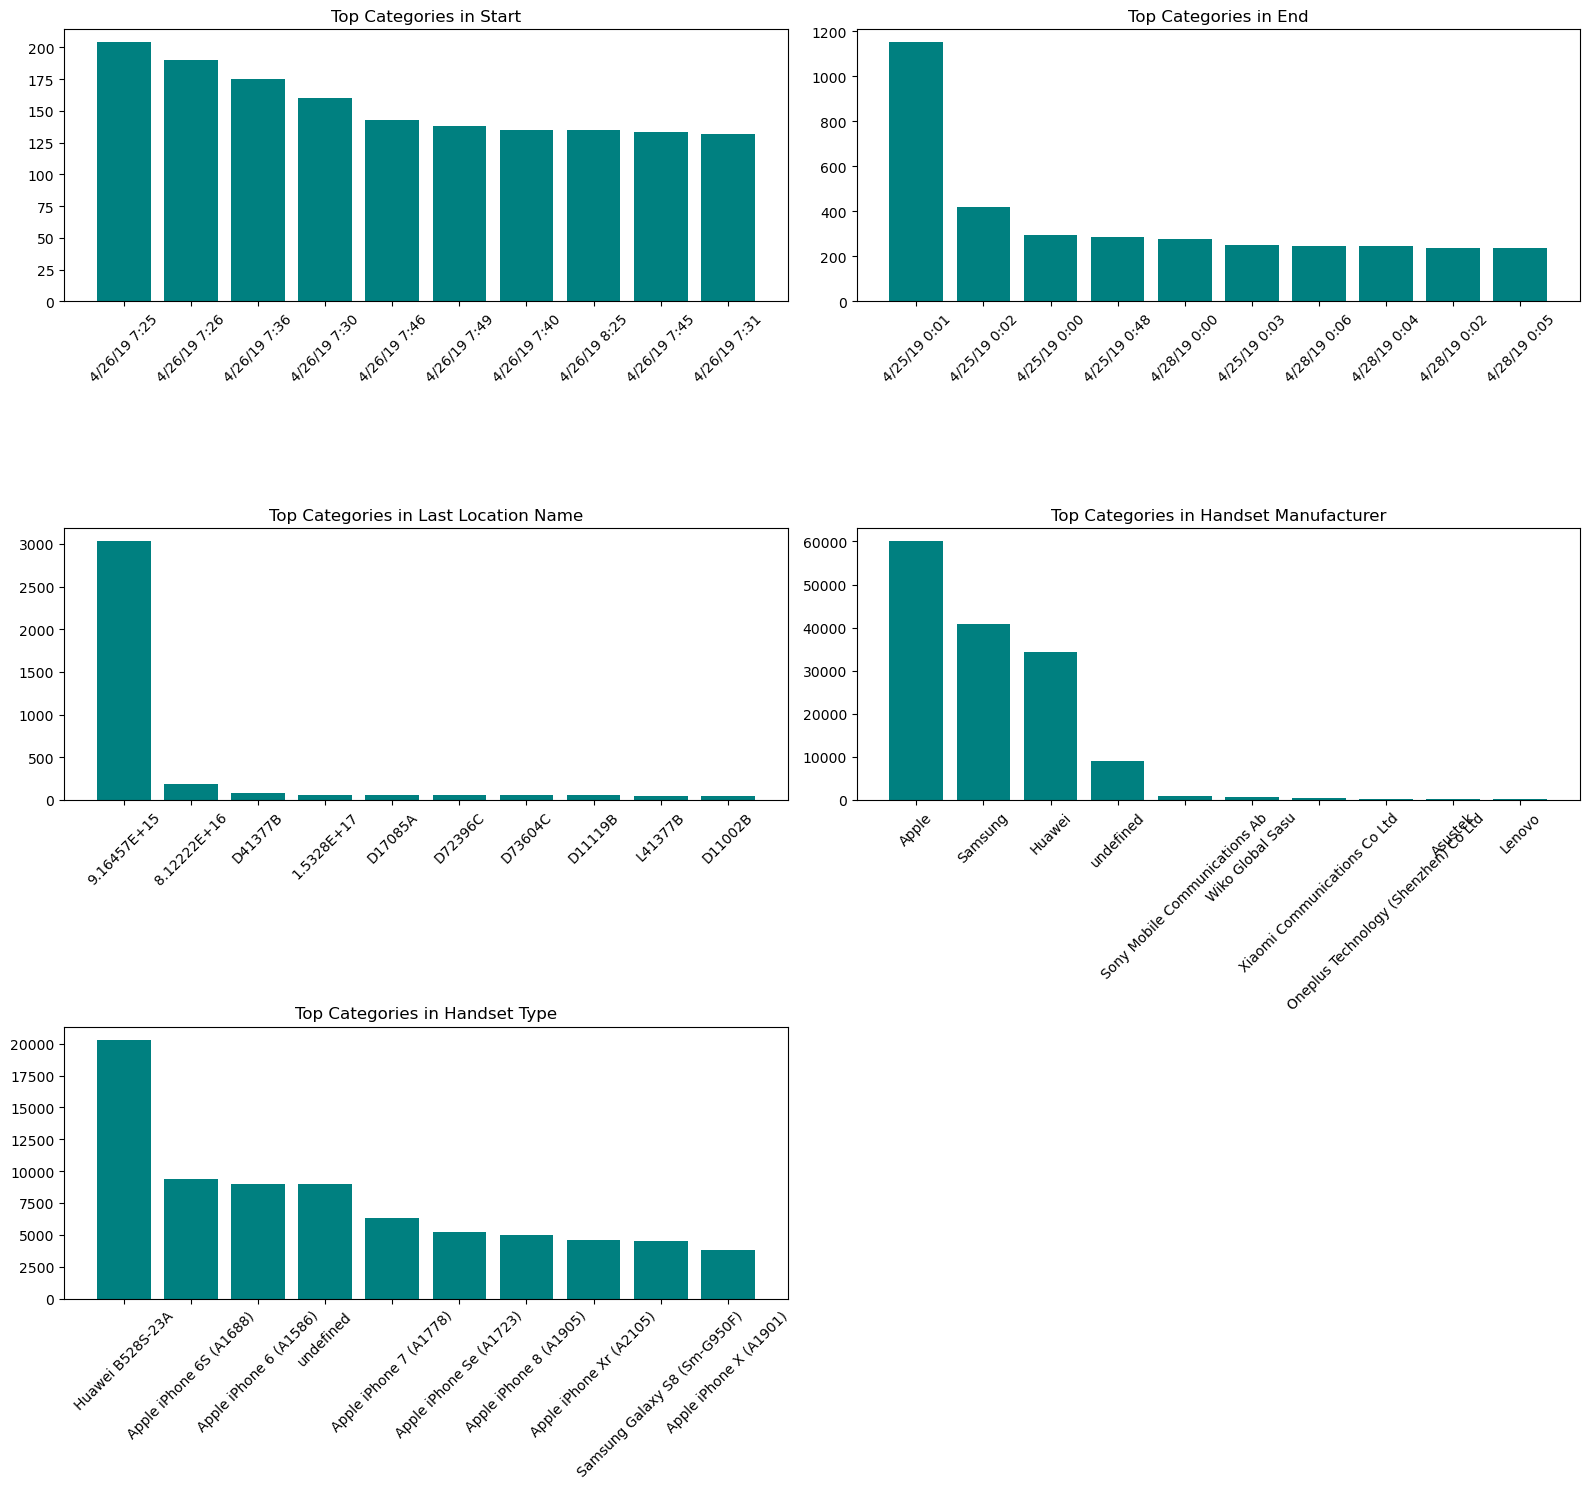

In [214]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

cols_per_row = 2
num_rows = (len(cat_cols) + 1) // cols_per_row

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(16, 5 * num_rows))
axes = axes.flatten()


for i, col in enumerate(cat_cols):
    top_vals = df[col].value_counts().nlargest(10)
    axes[i].bar(top_vals.index.astype(str), top_vals.values, color='teal')
    axes[i].set_title(f"Top Categories in {col}")
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

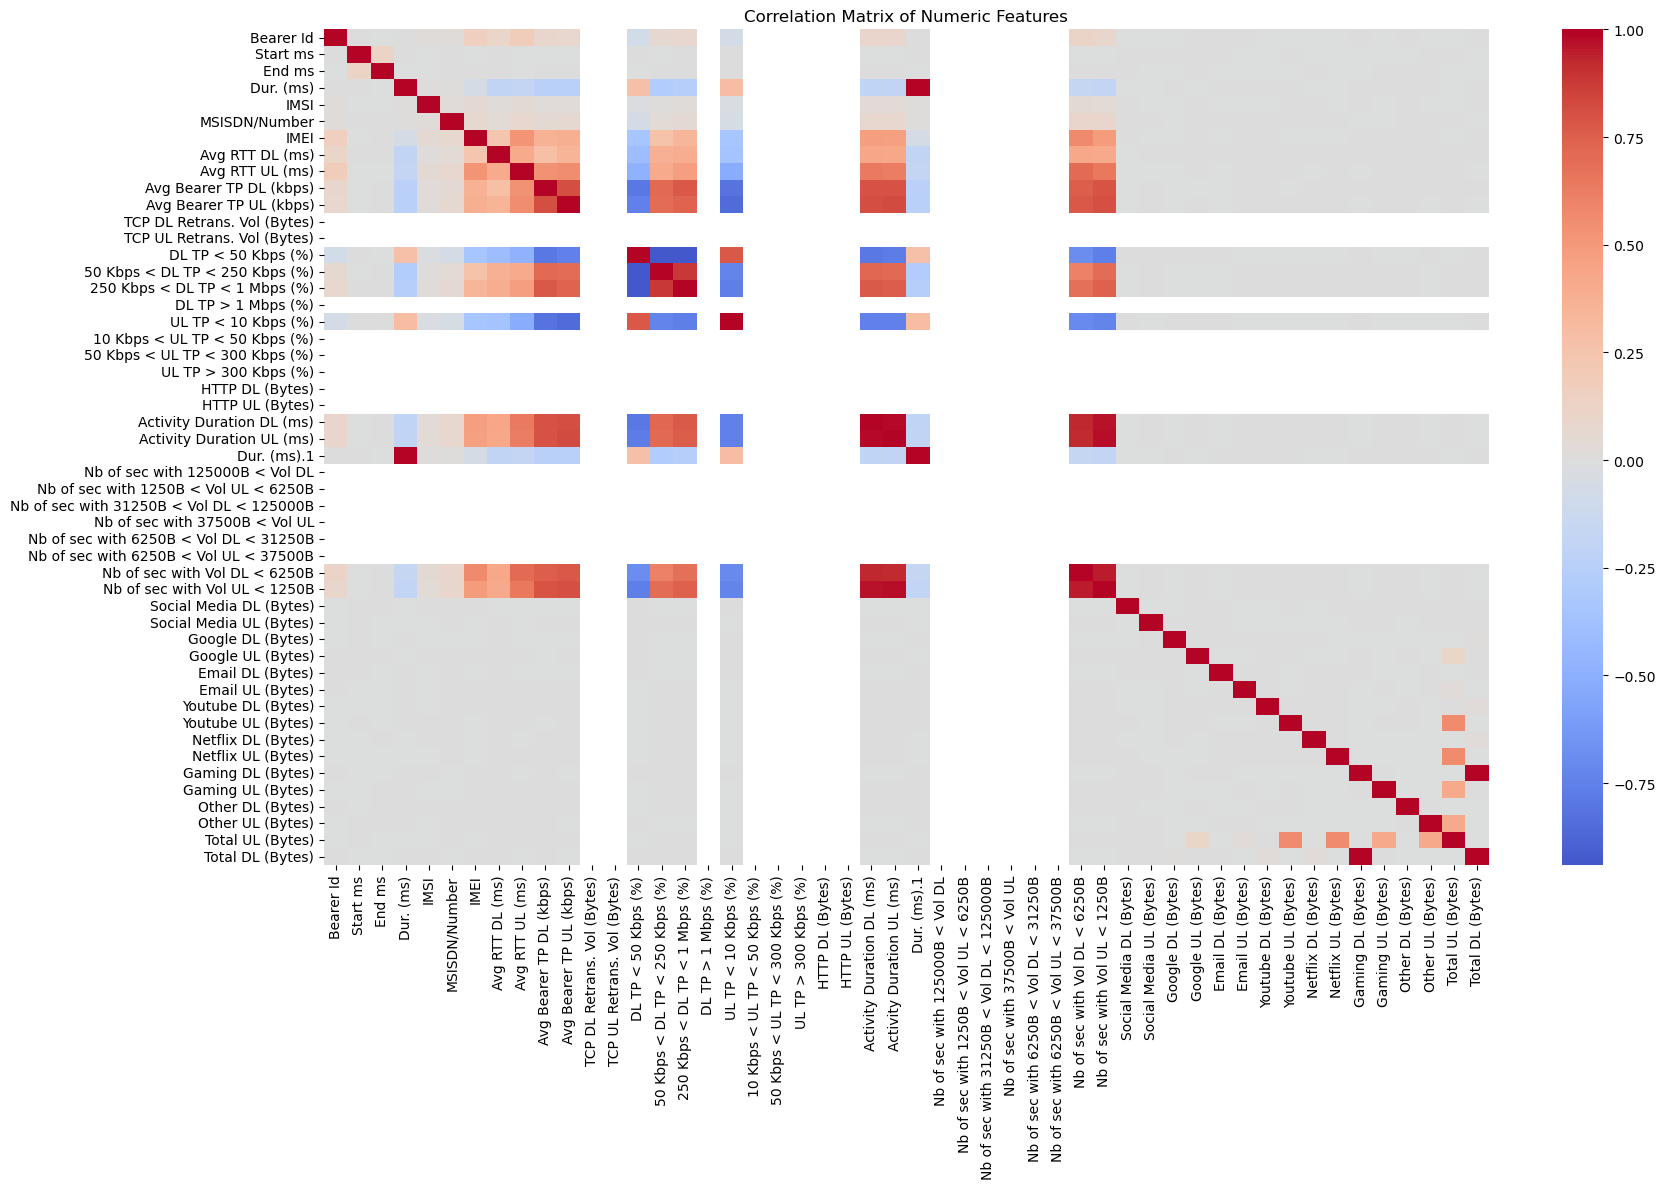

In [206]:
# Correlation Analysis
corr = df.select_dtypes(include='number').corr()

# Heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

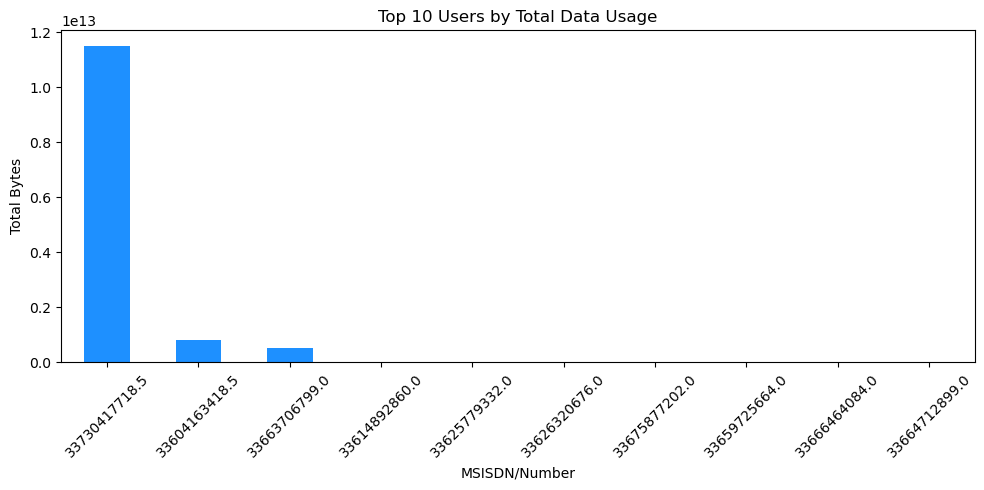

In [208]:
# Top Users by Total Data Usage
# Sort users by highest total data usage (DL + UL)
df['Total Data (Bytes)'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']
top_users = df.groupby('MSISDN/Number')['Total Data (Bytes)'].sum().sort_values(ascending=False).head(10)
top_users.plot(kind='bar', figsize=(10,5), title="Top 10 Users by Total Data Usage", color='dodgerblue')
plt.ylabel("Total Bytes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

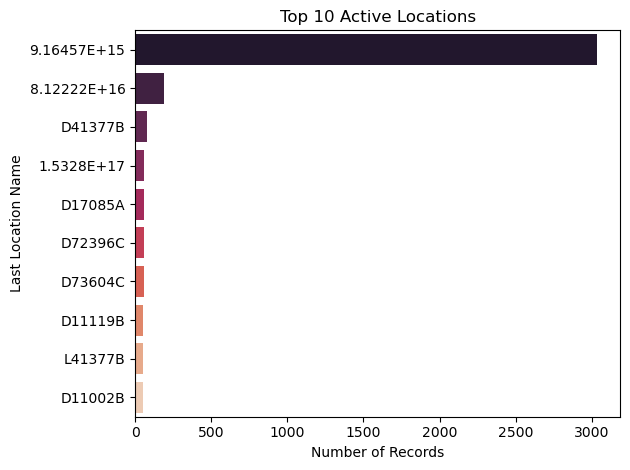

In [210]:
top_locations = df['Last Location Name'].value_counts().nlargest(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette="rocket")
plt.title("Top 10 Active Locations")
plt.xlabel("Number of Records")
plt.tight_layout()
plt.show()

In [218]:
df.to_csv("dataset/cleaned_telcom_data.csv", index=False)